# <font color= Red ><center>Customer segmentation using Clustering</center></color>

# Description:

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. I have taken this dataset from kaggle to create customer segmentation using Hierarchical clustering and K-Means Clustering. Also performed a basic EDA to understand the nature of variables.

**Dataset url : https://www.kaggle.com/vinyasshreedhar0309/bank-marketing-data**


### Import necesscary Libraries

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [49]:
df=pd.read_csv('bank_Customer segmentation.csv')

### Sample of the dataset

In [50]:
df.head() 

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [51]:
df.shape 

(210, 7)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [53]:
df.isnull().any()

spending                        False
advance_payments                False
probability_of_full_payment     False
current_balance                 False
credit_limit                    False
min_payment_amt                 False
max_spent_in_single_shopping    False
dtype: bool

In [54]:
df.duplicated().sum()

0

* There are total 210 rows and 7 columns in the dataset.  
* All the columns are Float data type.
* From the above results we can see that there is no missing value present in the dataset.
* Also checked that there is no duplicate rows.

# EDA

**Statiscal Summary**

In [55]:
df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


**The above table shows the statistical summary of the dataset, that are listed below**  

* The amount spent by customers varies from 10.59 thousands to 21.18 thousands and the average spending amount is 14.8 thousands.  
* The advance_payments done  by customers varies from 12.4 hundreds to 17.25 hundreds and the average advance_payments is 14.55 hundreds.
* The current balance has maintained by the customers varies form 4.89 thousands to 6.67 thousands and the mean current balance is 5.62 thousands.  
* The credit limit for various customers ranges from 2.63 thousands to 4.03 thousands and the average credit limit is 3.25 thousands.  
* The min_payment_amt done  by customers varies from 0.76 hundreds to 8.45 hundreds and the average min_payment_amt is 3.7 hundreds.
* max_spent_in_single_shopping by customer varies from 4.51 thousands to 6.55 thousands and the average amount spent in single shopping is 5.4 thousands

It seems dataset have no Anomalies, Bad values and Missing values. So we can proceed with a Data Visualization. i.e Univariate and Multivariate Analysis and Data Preparation.

## Data Visualization

### Univariate Analysis

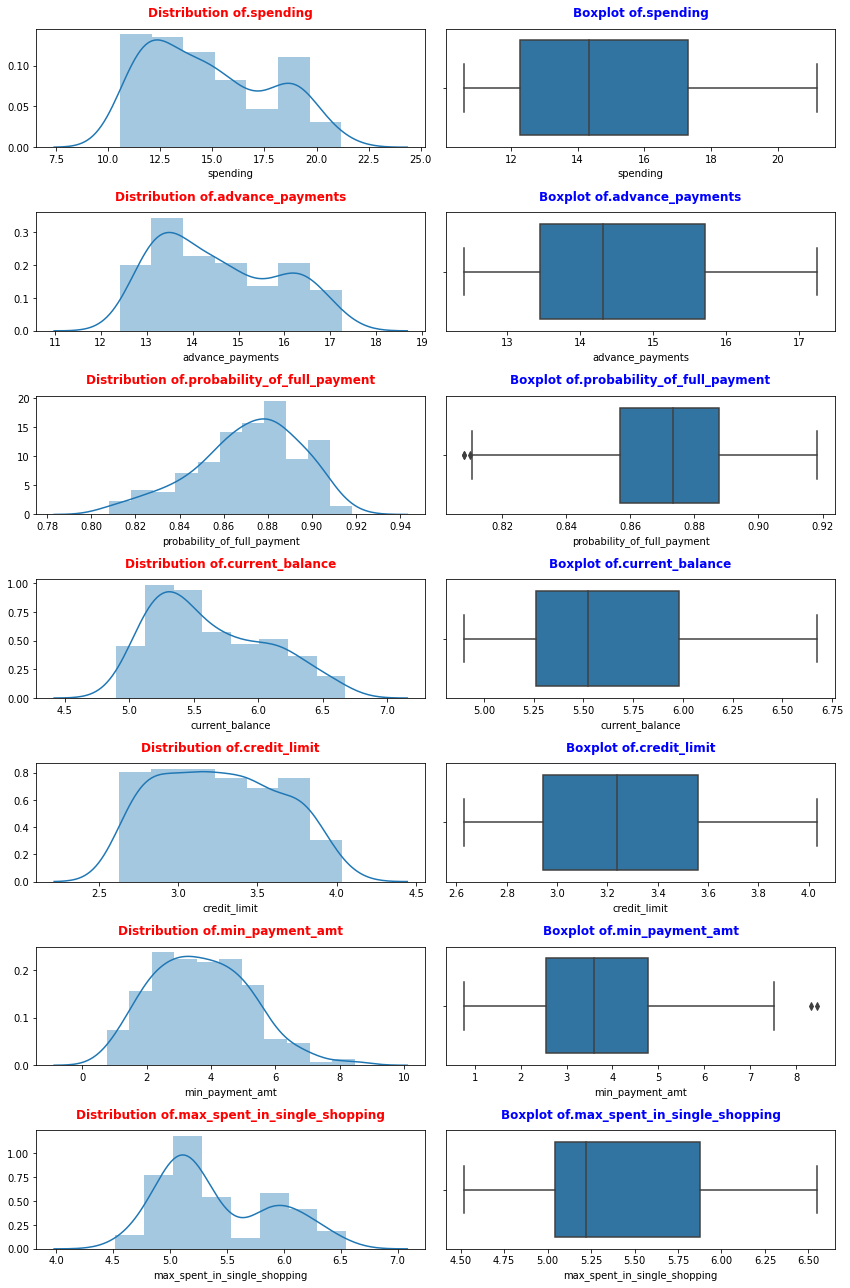

In [56]:
plt.figure(figsize=(12,18))
for i in range(len(df.columns)):
    plt.subplot(7,2,(2*i)+1)
    sns.distplot(df[df.columns[i]])
    plt.title('Distribution of.{}'.format(df.columns[i]),weight='bold',color='red',y=1.05)
    plt.subplot(7,2,(2*i)+2)
    sns.boxplot(df[df.columns[i]])
    plt.title('Boxplot of.{}'.format(df.columns[i]),weight='bold',color='Blue',y=1.05)
    plt.tight_layout()

In [57]:
# Skewness in each variables
for i in range(len(df.columns)):
    print ('Skew of',df.columns[i],  '= ',round(df[df.columns[i]].skew(),2))

Skew of spending =  0.4
Skew of advance_payments =  0.39
Skew of probability_of_full_payment =  -0.54
Skew of current_balance =  0.53
Skew of credit_limit =  0.13
Skew of min_payment_amt =  0.4
Skew of max_spent_in_single_shopping =  0.56


**From the above graph, we can observe the following informations** 
* The variable spending is slightly right skewed and have no outliers.  
* The variable advance_payments is slightly right skewed and have no outliers. 
* The variable probability_of_full_payment is seems to have moderate left skew and have few outliers on lower side. 
* The variable current_balance is seems to have moderate right skew and have no outliers.
* The variable credit_limit is seems to have less right skew and have no outliers. 
* The variable min_payment_amt is slightly right skewed and have few outliers on higher side.  
* The variable max_spent_in_single_shopping is seems to have moderate right skew and have no outliers.

### Bivariate Analysis

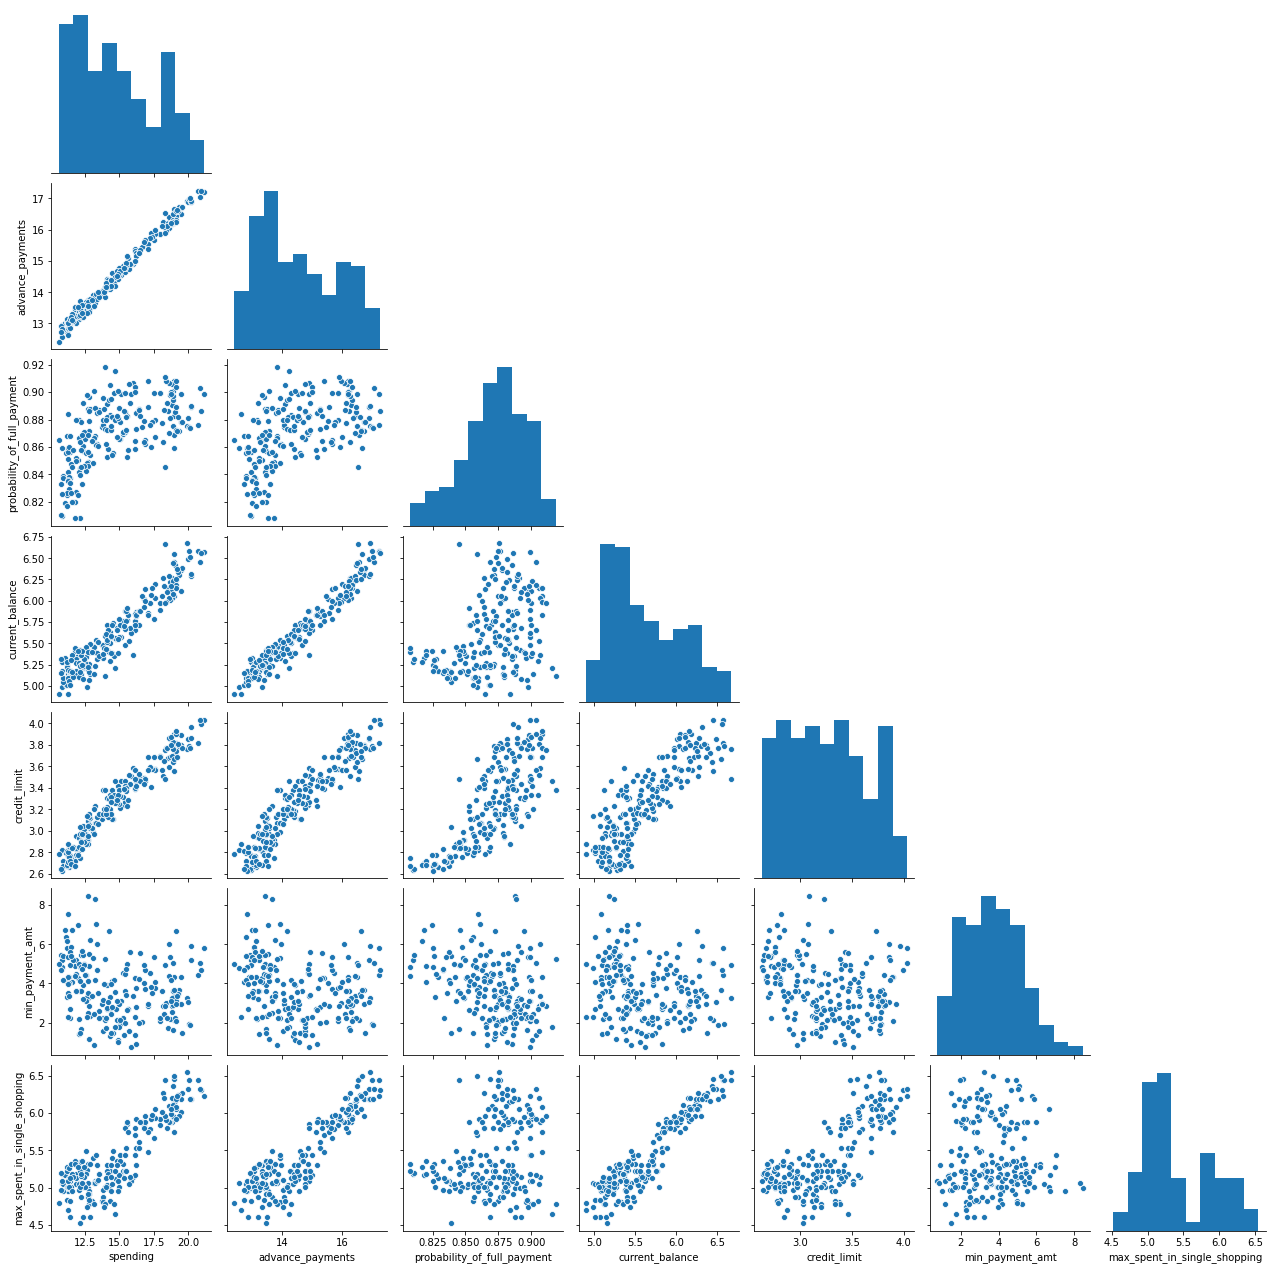

In [58]:
sns.pairplot(df,corner=True)
plt.show()

**The above pair plot shows the relationship between each variable to each other.We can see that there is a strong co-relation among many of the variables. The value of co-relation has been explained with the aid of heatmap**

**Heatmap**

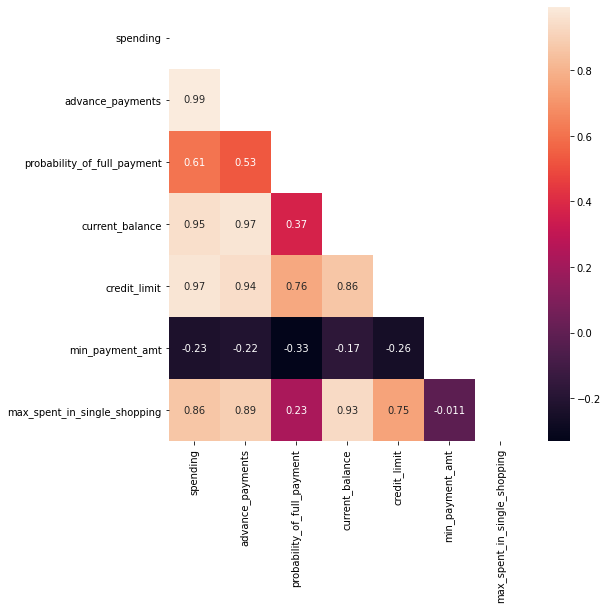

In [59]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,mask=np.triu(np.ones_like(df.corr(),dtype=np.bool)))
plt.show()

**From the above heatmap, we can observe that,**  
* The variable min_payment_amt have week negative correlation with all other variable
* The variable spending moderate correlation with probability_of_full_payment and have strong correlation with    advance_payments,current_balance,credit_limit and max_spent_in_single_shopping 
* The variable advance_payments  have strong correlation with current_balance,credit_limit and max_spent_in_single_shopping and have moderate correlation with probability_of_full_payment 
* The variable probability_of_full_payment have week correlation with current_balance & max_spent_in_single_shopping and have strong correlation with credit_limit
* The variable current_balance have strong correlation with credit_limit and max_spent_in_single_shopping 
* The variable credit_limit have strong correlation with max_spent_in_single_shopping 

## Data Preparation

**Outlier Detection and Treament**

* We found that Outliers are present in the variables probability_of_full_payment & min_payment_amt. Outliers should be treated since K-means clustering algorithm is sensitive to outliers, because a mean is easily influenced by extreme values.

* By using IQR we will detect outliers in these two variable.

* Replace the outlier which is on lower side with IQR-(1.5xIQR) and the outlier which is on higher side with IQR+(1.5xIQR).

In [60]:
def outlier_detection(col):
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    ur=Q3+(1.5*IQR)
    lr=Q1-(1.5*IQR)
    return ur,lr

In [61]:
ur,lr = outlier_detection(df['probability_of_full_payment'])
ur,lr

(0.9340875, 0.8105875)

In [62]:
df.probability_of_full_payment=np.where(df.probability_of_full_payment>ur,ur,df.probability_of_full_payment)
df.probability_of_full_payment=np.where(df.probability_of_full_payment<lr,lr,df.probability_of_full_payment)

In [63]:
ur,lr = outlier_detection(df['min_payment_amt'])

In [64]:
df.min_payment_amt=np.where(df.min_payment_amt>ur,ur,df.min_payment_amt)
df.min_payment_amt=np.where(df.min_payment_amt<lr,lr,df.min_payment_amt)

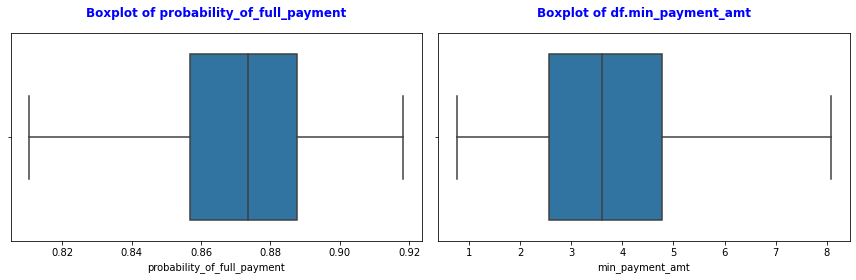

In [65]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(df.probability_of_full_payment)
plt.title('Boxplot of probability_of_full_payment',weight='bold',color='Blue',y=1.05)
plt.subplot(1,2,2)
sns.boxplot(df.min_payment_amt)
plt.title('Boxplot of df.min_payment_amt',weight='bold',color='Blue',y=1.05)
plt.tight_layout()

**The above plot confirms that no outliers are present in the variables probability_of_full_payment & min_payment_amt after outlier treatment**

**Scaling**

Scaling is necessary. Since Clustering is a distance based algorithm, which groups the observations, such that the observations belonging in the same group are similar, whereas observations in different groups are dissimilar.

In the given dataset some variables have different units of measure with respect to other. Some variables in units of thousands and some variables in units of hundreds.

In [66]:
df.describe().iloc[1:3,:]

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
mean,14.847524,14.559286,0.871025,5.628533,3.258605,3.697288,5.408071
std,2.909699,1.305959,0.023560,0.443063,0.377714,1.494689,0.491480


From the above table we can see that each variable has different mean and std  values. So we need to scale/normalize our features. If we don't do scaling/normalize our features, it may give more weights to some features than others.

**Now, am using Z-Score normalization.**

Z= x-µ/σ

Z-score value represents that how much the observation is away from the mean in the number of standard deviations. z-score scaling makes our feature distributions have mean = 0 and std = 1.


In [67]:
from scipy.stats import zscore

In [68]:
df_scaled=df.apply(zscore)
df_scaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813


**The above table shows our data once Z-score normalization is applied.**

## Hierarchical clustering 

**Choosing Linkage Method**

*	There is nothing like right or best linkage method to choose, since clustering itself an unsupervised learning, we can't tell one is better than other.
*	Single linkage uses the distance between two points which are closest to its neighbouring cluster and complete linkage uses the distance between two points which are farthest to its neighbouring.
*	But Average method consider all the distances between each point from one cluster to each points in other cluster. So am using average method in my problem.


**Dendrogram**

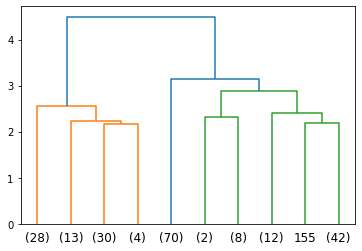

In [69]:
from scipy.cluster.hierarchy import dendrogram,linkage
linkage_method=linkage(df_scaled,method='average')
dend=dendrogram(linkage_method,truncate_mode='lastp',
                 p = 10,)

**The above diagram shows the truncated Dendrogram. For better visualization only last 10 cluster has been shown using truncate_mode option**

*	In dendrogram, we can observe that final 3 clusters have almost equal number of customers. Having balanced records in each segments gives the better insights.
*	Also customers can be segmented into three groups based on their spending amount as High, moderate and low
*	Customers who have higher credit limit means his income is more. Based on the credit limit (Income), we can group them into High, moderate and Low.

**Based on the above suggestions, I felt that optimum number of cluster will be 3.Thus dataset has been clustered into 3 segments using hierarchical clustering algorithm.**


In [70]:
from scipy.cluster.hierarchy import fcluster

In [71]:
cluster=fcluster(linkage_method,3,criterion='maxclust')
df_Hierarchical=df
df_Hierarchical['Hier_cluster']=cluster
df_Hierarchical.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Hier_cluster
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


**The above table shows the orginal dataset with cluster label(Hierrarchical clustering) in a separate column.**

**Cluster Frequency**

In [72]:
df_Hierarchical.Hier_cluster=pd.Categorical(df.Hier_cluster)

In [73]:
pd.DataFrame(df_Hierarchical['Hier_cluster'].value_counts())

,Hier_cluster
1,75
2,70
3,65


**The above tables shows the total number of customers belongs to each cluster. We can observe that, as similar to dendrogram, each cluster have nearly equal number of customers.**

**Customer segmentation can be visualized using the following scatter plots**

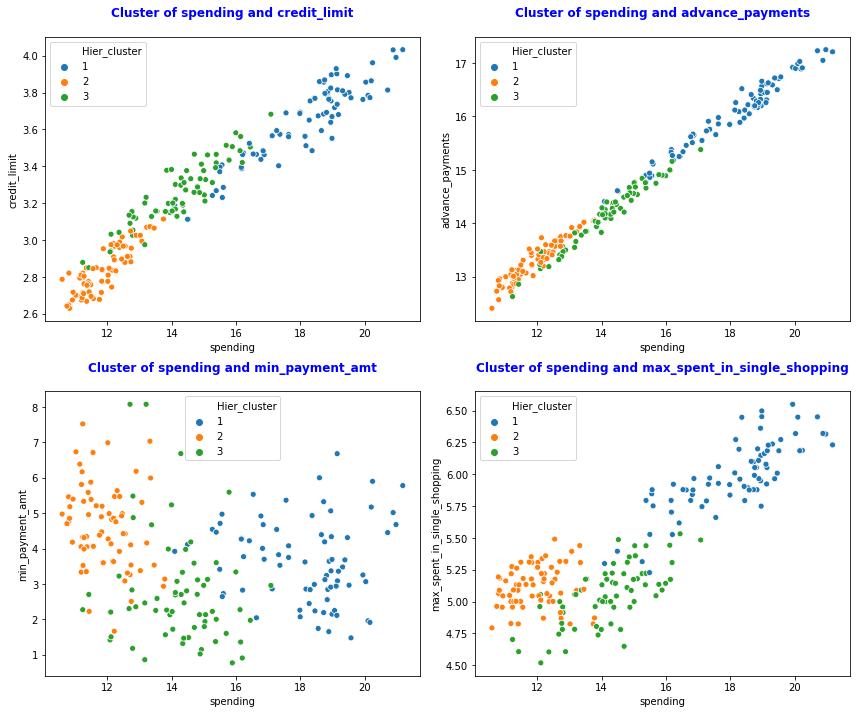

In [74]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.scatterplot(df_Hierarchical['spending'],df_Hierarchical['credit_limit'],hue=df_Hierarchical['Hier_cluster'])
plt.title('Cluster of spending and credit_limit',weight='bold',color='Blue',y=1.05)
plt.subplot(2,2,2)
sns.scatterplot(df_Hierarchical['spending'],df_Hierarchical['advance_payments'],hue=df_Hierarchical['Hier_cluster'])
plt.title('Cluster of spending and advance_payments',weight='bold',color='Blue',y=1.05)
plt.subplot(2,2,3)
sns.scatterplot(df_Hierarchical['spending'],df_Hierarchical['min_payment_amt'],hue=df_Hierarchical['Hier_cluster'])
plt.title('Cluster of spending and min_payment_amt',weight='bold',color='Blue',y=1.05)
plt.subplot(2,2,4)
sns.scatterplot(df_Hierarchical['spending'],df_Hierarchical['max_spent_in_single_shopping'],hue=df_Hierarchical['Hier_cluster'])
plt.title('Cluster of spending and max_spent_in_single_shopping',weight='bold',color='Blue',y=1.05)
plt.tight_layout()
plt.show()

**Cluster Profiles for Hierarchical Clustering**

In [75]:
cluster_profile=df_Hierarchical.groupby('Hier_cluster').mean()
cluster_profile['Freq']=df_Hierarchical['Hier_cluster'].value_counts()
cluster_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
Hier_cluster,,,,,,,,
1,18.129200,16.058000,0.881595,6.135747,3.648120,3.650200,5.987040,75
2,11.916857,13.291000,0.846845,5.258300,2.846000,4.619000,5.115071,70
3,14.217077,14.195846,0.884869,5.442000,3.253508,2.759007,5.055569,65


**The above table shows the mean value of each variable for all three cluster and insights are derived based on this table are given below**

Cluster 1: Higher Income (Due to higher income they have higher credit limit, spending more and paying more amount in advance.)

Cluster 2: Lower Income (Due to lower income they have lower credit limit, spending less and paying ony lesser amount in advance)

Cluster 3: Moderate Income(Having moderate credit limit and spending capability)

## K-Means clustering 

In [76]:
from sklearn.cluster import KMeans

In [77]:
k_means = KMeans(n_clusters = 2,random_state=1)
k_means.fit(df_scaled)

KMeans(n_clusters=2, random_state=1)

In [78]:
k_means.labels_

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

### Calculating WSS(within sum of square) for various values of K - Elbow Method

In [79]:
wss=[]

In [80]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(df_scaled)
    wss.append(KM.inertia_)

**KMeans clustering algorithm is applied on scaled data for differnt values of K. Intially given a value from 1 to 10 for K and WSS value is calculated for each values of K from 1 to 10. The below table shows WSS for each K value**  

In [81]:
wss_k=pd.DataFrame(wss,columns=['WSS'])
wss_k['K_value']=[1,2,3,4,5,6,7,8,9,10]
wss_k

,WSS,K_value
0,1470.000000,1
1,659.147401,2
2,430.298482,3
3,371.035664,4
4,325.974128,5
5,289.455249,6
6,263.859944,7
7,239.944466,8
8,220.593539,9
9,205.763342,10


**Based on the calculated values WSS plot has been plotted and shown below. The elbow in a below plot suggests that optimum number of cluster is 3. (K=3)**

In [82]:
K=[1,2,3,4,5,6,7,8,9,10]

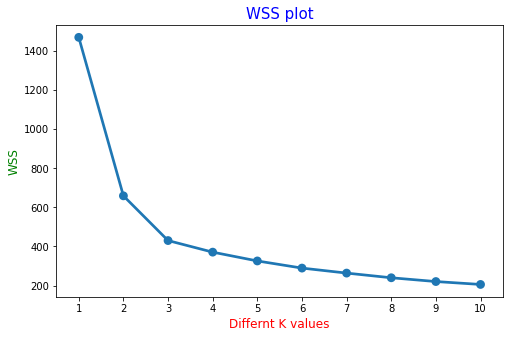

In [83]:
plt.figure(figsize=(8,5))
sns.pointplot(K, wss)
plt.title('WSS plot',fontsize=15,color='blue')
plt.xlabel('Differnt K values',fontsize=12,color='red')
plt.ylabel('WSS',fontsize=12,color='green')
plt.show()

### Cluster evaluation by the silhouette score

**We already find the optimum number of cluster by WSS plot. For further confirmation we are evaluting the cluster by the silhouette score for different K values(K=2,3,4,5)**

In [84]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [85]:
ss=[]

In [86]:
for i in range(2,6):   
    k_means = KMeans(n_clusters = i,random_state=1)
    k_means.fit(df_scaled)
    labels = k_means.labels_
    ss.append(silhouette_score(df_scaled,labels,random_state=1))

In [87]:
ss=pd.DataFrame(ss,columns=['silhouette_score'])
ss['K_value']=[2,3,4,5]
ss

,silhouette_score,K_value
0,0.465601,2
1,0.400806,3
2,0.337366,4
3,0.286070,5


**The above table shows the silhouette_score for K=2,3,4,5. silhouette_score is high for k=2, but making two cluster is does not give us a better insights. So optimum number of cluster consider as 3, since WSS plot also suggests the same.**

### KMeans Clustering for K=3

In [88]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(df_scaled)
labels = k_means.labels_

In [89]:
silhouette_samples(df_scaled,labels).min()

0.002768541128616533

**For K=3,the minimum value of silhouette_samples = 0.002. As minimum value is positive. So we can confirm that no observation is mapped to incorrect cluster.**

In [90]:
df=df.drop('Hier_cluster',axis=1)
df["KMeans_clust"]=labels
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,KMeans_clust
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,0
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


The above table shows the orginal dataset with cluster label(KMeans clustering) in a separate column.

**Cluster Frequency**

In [91]:
df.KMeans_clust=pd.Categorical(df.KMeans_clust)
pd.DataFrame(df['KMeans_clust'].value_counts())

,KMeans_clust
0,72
2,71
1,67


**The above tables shows the total number of customer belongs to each cluster. We can observe that, as similar to hierarchical clustering each cluster have nearly equal number of customers.**

**Cluster Profiles for KMeans Clustering**

In [92]:
cluster_profile=df.groupby('KMeans_clust').mean()
cluster_profile['Freq']=df['KMeans_clust'].value_counts()
cluster_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
KMeans_clust,,,,,,,,
0,11.856944,13.247778,0.848330,5.231750,2.849542,4.733892,5.101722,72
1,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,67
2,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,71


**The above table shows the mean value of each variable for all three cluster and insights are derived based on this table are given below**

Cluster 1: Higher Income (Due to higher income they have higher credit limit, spending more and paying more amount in advance.)

Cluster 2: Lower Income (Due to lower income they have lower credit limit, spending less and paying only lesser amount in advance)

Cluster 3: Moderate Income(Having moderate credit limit and spending capability)

**Customer segmentation can be visualized using the following scatter plots**

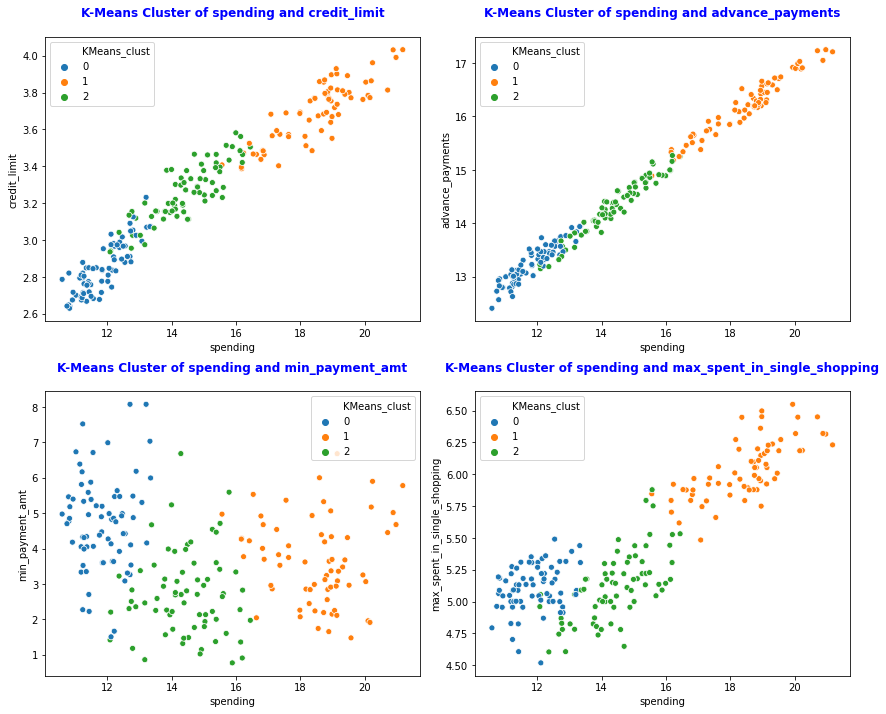

In [93]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.scatterplot(df['spending'],df['credit_limit'],hue=df['KMeans_clust'])
plt.title('K-Means Cluster of spending and credit_limit',weight='bold',color='Blue',y=1.05)
plt.subplot(2,2,2)
sns.scatterplot(df['spending'],df['advance_payments'],hue=df['KMeans_clust'])
plt.title('K-Means Cluster of spending and advance_payments',weight='bold',color='Blue',y=1.05)
plt.subplot(2,2,3)
sns.scatterplot(df['spending'],df['min_payment_amt'],hue=df['KMeans_clust'])
plt.title('K-Means Cluster of spending and min_payment_amt',weight='bold',color='Blue',y=1.05)
plt.subplot(2,2,4)
sns.scatterplot(df['spending'],df['max_spent_in_single_shopping'],hue=df['KMeans_clust'])
plt.title('K-Means Cluster of spending and max_spent_in_single_shopping',weight='bold',color='Blue',y=1.05)
plt.tight_layout()
plt.show()

**Cluster Profiles based on KMeans Clustering**

The given customers has been segmented into three groups using KMeans algorithm. cerdit_limit directly says the income of the customer. Bank gives higher credit limit to those who earns more. Also customer earns more have capability to spend much. Based on these considerations, I have spliited the entire data into three cluster namely Higher income, Moderate income and Lower income.

The below table shows the average values of 'spending', 'advance_payments', 'probability_of_full_payment', 'current_balance', 'credit_limit', 'min_payment_amt' & 'max_spent_in_single_shopping' along all three clusters

In [94]:
cluster_profile=df.groupby('KMeans_clust').mean()
cluster_profile['Freq']=df['KMeans_clust'].value_counts()
cluster_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
KMeans_clust,,,,,,,,
0,11.856944,13.247778,0.848330,5.231750,2.849542,4.733892,5.101722,72
1,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,67
2,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,71


**The above table shows the mean value of each variable for all three clusters and insights are derived based on this table are given below**

Cluster 1: Higher Income (Due to higher income they have higher credit limit, spending more and paying more amount in advance.)

Cluster 2: Lower Income (Due to lower income they have lower credit limit, spending less and paying only lesser amount in advance)

Cluster 3: Moderate Income (Having moderate credit limit and spending capability)